# Beleg 1: Werkzeugkasten

**Name: Liav Keren**
<br>
**Matrikelnummer.: S0574657**

## Bearbeitungszeitraum: 
**13.11. - 18.12**<br>
Besprechung am 19.12 in der Übung



**Hinweise zum Beleg:** 
- Die erfolgreiches Bestehen des Belegs ist Voraussetzung zum Bestehen des Kurses. 
- Sofern nicht anders angegeben können die Operationen mit einer Library Ihrer Wahl durchgeführt werden.

# Aufgabe 1: Einführung

**Aufgabe 1.1**:
Laden Sie das Testbild 'CT.png', wandeln es in ein Bild mit einem Kanal um und stellen es mittels matplotlib.pyplot mit der Funktion imshow und der Option cmap='gray' dar.

In [1]:
!pip3 install pillow

In [2]:
import os
os.getcwd()

'/home/liav/Documents/htw/wise22_23/med_bv/med_bv_beleg1'

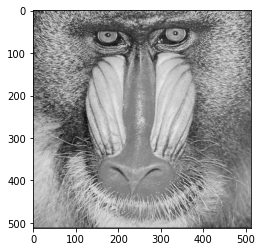

In [3]:
#Aufgabe 1.1
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def read_and_show_img(path):
    image = np.array(Image.open(path).convert("L"), dtype=np.int32)
    #color_img = np.asarray(Image.open(PATH)) / 255
    #img = np.mean(color_img, axis=2)
    plt.imshow(image, cmap='gray')
    return image

image = read_and_show_img("Baboon.png")

**Aufgabe 1.2**: Geben Sie die Dimensionen des Bildes (Breite und Höhe) in Pixel sowie den jeweils kleinsten und größten Wert im Bild aus.  

In [4]:
#Aufgabe 1.2

print(f'Height: {image.shape[0]}\n Width: {image.shape[1]}\n Minimum pixel value {np.min(image)}\n Maximum Pixel value{np.max(image)}')

Height: 512
 Width: 512
 Minimum pixel value 0
 Maximum Pixel value231


**Aufgabe 1.3**: Als nächstes soll im CT Bild der schwarze Rand abgeschnitten werden, da dort keine Informationen über die aufgenommenen Strukturen zu finden sind. Zu diesem Zweck sollen Sie eine Bounding Box um den relevanten Bereich bestimmen. Dabei handelt es sich idealerweise um das kleinste parallel zu den Achsen verlaufendes Rechteck, dass sich über alle Bildbereiche erstreckt, in denen Inhalte zu finden sind (hier Pixel die nich schwarz sind). Nutzen Sie nun die gefundene Bounding Box, um das Bild entsprechend zuzuschneiden (oder auch zu "croppen").

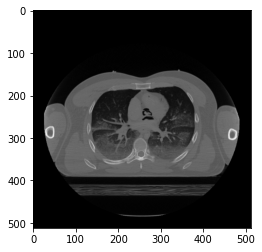

In [5]:
# Aufgabe 1.3
img_ct = read_and_show_img(path = "CT.png")

In [6]:
img_ct.shape

(512, 512)

In [67]:
def get_max_radius(srcImage, kernel_size, prev_box):
    r = 0
    height, width = srcImage.shape
    mid_height= height/2
    mid_width = width/2
    max_r = np.sqrt(mid_height**2 + mid_width**2)
    temp_arr = np.zeros(shape=(kernel_size, kernel_size))
    mid_kernel = kernel_size/2
    for i in range(kernel_size):
        for j in range(kernel_size):
            i_img = (int)(i+(mid_height-mid_kernel))
            j_img = (int)(j+(mid_width-mid_kernel))
            temp_arr[i, j] = srcImage[i_img, j_img]
    
    prev_box = np.pad(prev_box, (1), mode='constant')
    final_arr = temp_arr - prev_box
    
    if(not final_arr.any()>0):
        print("this has been called")
        kernel_size = (int)(kernel_size/2)
        print('result of r is ')
        
        r = (int)((height - kernel_size)/2)
        
        plt.imshow(srcImage[r:srcImage.shape[0]-r, r:srcImage.shape[1]-r], cmap='gray')
    else:
        get_max_radius(srcImage, kernel_size+2, temp_arr)

def bounding_box(srcImage, kernel_size):
    height, width = srcImage.shape
    empty_arr = np.zeros(shape=(6,6))
    print('what i actually get')
    print(get_max_radius(srcImage, kernel_size, empty_arr))
    something = get_max_radius(srcImage, kernel_size, empty_arr)
    
    srcImage[r:srcImage.shape[0]-r, r:srcImage.shape[1]-r]    

this has been called
result of r is 


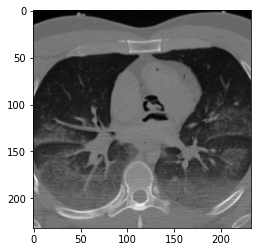

In [68]:
#bb_img = bounding_box(img_ct, 8)
get_max_radius(img_ct, 8, np.zeros(shape=(6,6)))

In [ ]:
temp_arr = np.zeros(shape=(512, 512))
mid = 512/2
for i in range(512):
    for j in range(512):
        if(i>0 and i<512):
            temp_arr[i, 0] = img_ct[(int)(i+(mid_height-mid_kernel))
                    , (int)((mid_height-mid_kernel))]
                temp_arr[i, 1] = srcImage[(int)(i+(mid_height-mid_kernel))
                    , (int)((mid_height+mid_kernel))]

# Aufgabe 2: Farb- und Grauwertereduktion

**Aufgabe 2.1**:
Implementieren Sie den Median-Cut Algorithmus so dass die Method sowohl für Grauwertebilder (ein Kanal) als auch Farbbilder (3 Kanäle) anwendbar ist.

**Aufgabe 2.2**: Reduzieren Sie die Farben / Grauwert in den Bildern Baboon.png und Lena.png auf 2,4,8,16 mittels des Median-Cut Algorithmus und stellen Sie das Ergebnis jeweils dar.

In [ ]:
# Aufgabe 2.2

# Aufgabe 3: Filter

**Aufgabe 3.1**: Implementieren Sie eine Funktion welche einen beliebigen Faltungskern auf ein Grauwerte oder Farbbild anwendet. Der Faltungskern und das Bild sollen hierbei Übergabewerte für die Funktion sein.

In [ ]:
# Aufgabe 3.1

**Aufgabe 3.2**: Implementieren Sie eine Funktion welche den Faltungskern für den Binomialfilter erzeugt. Die Dimension des Filterkerns soll hierbei frei wählbar sein und der Funktion übergeben werden. Achten Sie auf die Normierung des Kerns

In [ ]:
# Aufgabe 3.2

**Aufgabe 3.3** Wenden Sie auf das Bild 'Lena.png' Binomialfilter der Größen 3x3, 5x5, 11x11, 21x21 an und stellen Sie die Resultate dar.

In [ ]:
# Aufgabe 3.3

**Aufgabe 3.4** Wenden Sie auf die Bilder 'Lena.png' und 'Baboon.png' den isotropen Laplace Filter an. Überlegen Sie sich eine geeignete Normierung / Verschiebung der Farbwerte für die erhaltenen Bilder und stellen Sie die Ergebnisse dar. (Erklären Sie Ihre Darstellungsweise kurz).

In [ ]:
# Aufgabe 3.4